<a href="https://colab.research.google.com/github/coho905/Breast_Cancer/blob/main/BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
from sklearn import linear_model
from sklearn import metrics
import numpy as np
from sklearn.metrics import accuracy_score 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as npmy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
cancer = pd.read_csv('Breast_cancer_data.csv')

In [ ]:
cancer.head()


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
cancer.tail()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0
568,7.76,24.54,47.92,181.0,0.05263,1


In [ ]:
X = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']
y = 'diagnosis'

In [ ]:
train, test = train_test_split(cancer, test_size = 0.2, random_state = 1)
X_train = train[X]
y_train = train[y]
X_test = test[X]
y_test = test[y]

In [ ]:
log_model = linear_model.LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8771929824561403


In [ ]:
from sklearn import tree

# We'll first specify what model we want, in this case a decision tree
class_dt = tree.DecisionTreeClassifier(max_depth=15)

# We use our previous `X_train` and `y_train` sets to build the model
class_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(442.99756097560976, 616.08, 'X[2] <= 98.755\ngini = 0.468\nsamples = 455\nvalue = [170, 285]'),
 Text(298.0536585365854, 543.6, 'X[2] <= 89.995\ngini = 0.213\nsamples = 314\nvalue = [38, 276]'),
 Text(163.3170731707317, 471.12, 'X[2] <= 85.25\ngini = 0.108\nsamples = 263\nvalue = [15, 248]'),
 Text(89.82439024390244, 398.64000000000004, 'X[4] <= 0.109\ngini = 0.046\nsamples = 214\nvalue = [5, 209]'),
 Text(48.99512195121952, 326.16, 'X[4] <= 0.1\ngini = 0.021\nsamples = 188\nvalue = [2, 186]'),
 Text(32.66341463414634, 253.68, 'gini = 0.0\nsamples = 140\nvalue = [0, 140]'),
 Text(65.32682926829268, 253.68, 'X[1] <= 25.875\ngini = 0.08\nsamples = 48\nvalue = [2, 46]'),
 Text(48.99512195121952, 181.20000000000005, 'X[4] <= 0.1\ngini = 0.042\nsamples = 47\nvalue = [1, 46]'),
 Text(32.66341463414634, 108.72000000000003, 'X[3] <= 337.8\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(16.33170731707317, 36.24000000000001, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(48.9951219512

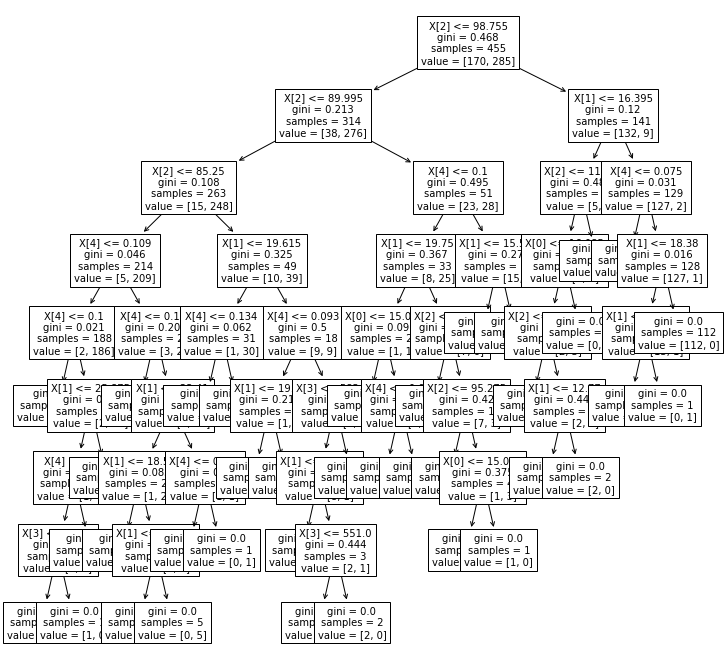

In [ ]:
plt.figure(figsize=(12,12)) 
tree.plot_tree(class_dt, fontsize=10)

In [ ]:
y_pred = class_dt.predict(X_test)

In [ ]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))

Accuracy:  0.8771929824561403
Precision:  0.8536585365853658
Recall:  0.9722222222222222


In [ ]:
best = 0
high = 0
for i in range(1, 100):
  mod = KNeighborsClassifier(i)
  mod.fit(X_train, y_train)
  temp = mod.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  if acc > high:
    high = acc
    best = i
print('best model KNN is: ' + str(best) + '. best accuracy is: ' + str(acc))  


classifiers = [
    KNeighborsClassifier(1),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(classifier.__class__.__name__ + ' ' + str(accuracy)) 

best model KNN is: 1. best accuracy is: 0.8771929824561403
KNeighborsClassifier 0.8508771929824561
SVC 0.8596491228070176
SVC 0.631578947368421
GaussianProcessClassifier 0.868421052631579
DecisionTreeClassifier 0.8596491228070176
RandomForestClassifier 0.8771929824561403
MLPClassifier 0.8333333333333334
AdaBoostClassifier 0.9035087719298246
GaussianNB 0.8947368421052632
QuadraticDiscriminantAnalysis 0.9210526315789473
